In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from numpy import unique
from numpy import where

Affinity Propagation clustering algorithm:

This clustering algorithm is completely different from the others in the way that it clusters data.

Each data point communicates with all of the other data points to let each other know how similar they are and that starts to reveal the clusters in the data. You don't have to tell this algorithm how many clusters to expect in the initialization parameters.

As messages are sent between data points, sets of data called exemplars are found and they represent the clusters.

An exemplar is found after the data points have passed messages to each other and form a consensus on what data point best represents a cluster.

When you aren't sure how many clusters to expect, like in a computer vision problem, this is a great algorithm to start with.

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')


In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
from sklearn.cluster import AffinityPropagation

In [5]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
X = dataset.iloc[:, [3, 4]].values

In [8]:
from sklearn.cluster import AffinityPropagation

In [9]:
# Apply the BIRCH algorithm
ap_model = AffinityPropagation()
ap_model.fit(X)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=None, verbose=False)

In [10]:
# Assign each data point to a cluster
ap_pred =ap_model.predict(X)

In [11]:
# Get unique clusters
ap_clusters = np.unique(ap_pred)

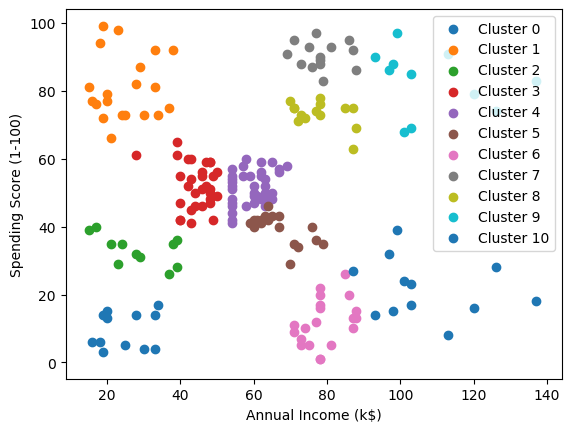

In [12]:
# Plot the BIRCH clusters
for ap_cluster in ap_clusters:
    # Get indices of data points in this cluster
    indices = where(ap_pred == ap_cluster)
    # Make the plot
    pyplot.scatter(X[indices, 0], X[indices, 1], label=f'Cluster {ap_cluster}')

# Add labels and legend
pyplot.xlabel('Annual Income (k$)')
pyplot.ylabel('Spending Score (1-100)')
pyplot.legend()
pyplot.show()

In [13]:
supervised=pd.DataFrame(dataset)

In [14]:
supervised['Cluster_group']=ap_pred

In [15]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,9
196,197,Female,45,126,28,10
197,198,Male,32,126,74,9
198,199,Male,32,137,18,10


C:\Users\jugip\anaconda3\envs\aiml\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


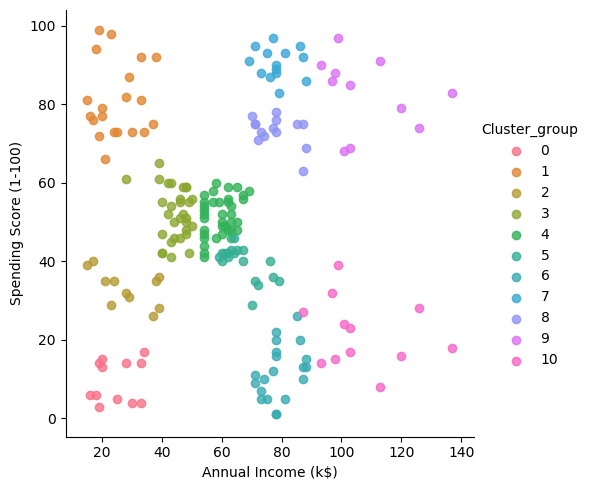

In [16]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False, legend=True, legend_out=True)